In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

##### SCRAPE DATA FROM THE WIKIPEDIA URL PAGE : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [4]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [5]:
List = BeautifulSoup(source, 'xml')
table=List.find('table')
#There will be three columns listed in the dataframe: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df1 = pd.DataFrame(columns = column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df1.loc[len(df1)] = row_data
df1.head(10)

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


##### DATA CLEANING 

In [8]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is "Not assigned".
df1=df1[df1['Borough']!='Not assigned']
df1.head(10)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [12]:
#A cell has a borough (example: North York) but for neighbourhood it shows it is "Not assigned", 
#then the neighborhood will be the same as the borough (example: "North York" will be assigned as "North York" in neighbourhood.)
indexNames = df1[ df1['Borough'] =='Not assigned'].index
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)
df1.head(30)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [11]:
#If there is duplicate postal code, then combine two rows into one row of neighborhood (example: there duplicates of "M6A" which will be combined)
unique_neigh = df1.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df1_new=unique_neigh.reset_index()
df1_new.head(20)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [13]:
# The function "shape" will show how the number of coulmns and rows for the table shown above.
df1_new.shape

(103, 3)

In [31]:
# We will import and read the csv file "Geospatial_Coordinates.csv", then merge both tables to together to view longitude and latitude of each neighbourhood.
!wget -q -O 'Geospatial_Coordinates.csv'  http://cocl.us/Geospatial_data
df2_geospatial = pd.read_csv('Geospatial_Coordinates.csv')
df2_geospatial.columns=['Postalcode','Latitude','Longitude']
Toronto_geospatial = pd.merge(df1_new,
                 df2_geospatial[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
Toronto_geospatial   

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [34]:
#!conda install -c conda-forge geopy --yes
#from geopy.geocoders import Nominatim 
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
import os
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

In [138]:
address = 'Toronto, ON'
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="Toronto")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [166]:
CLIENT_ID = [] # Your Client ID
CLIENT_SECRET =[]  # Your Client Secret
VERSION = '20180605'

In [156]:
# defining radius and limit of venues to get
radius=700
LIMIT=100

In [157]:
def get_Venues(lat,lng):
    
    
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [158]:
#Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.
def get_venue_details(venue_id):
        
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

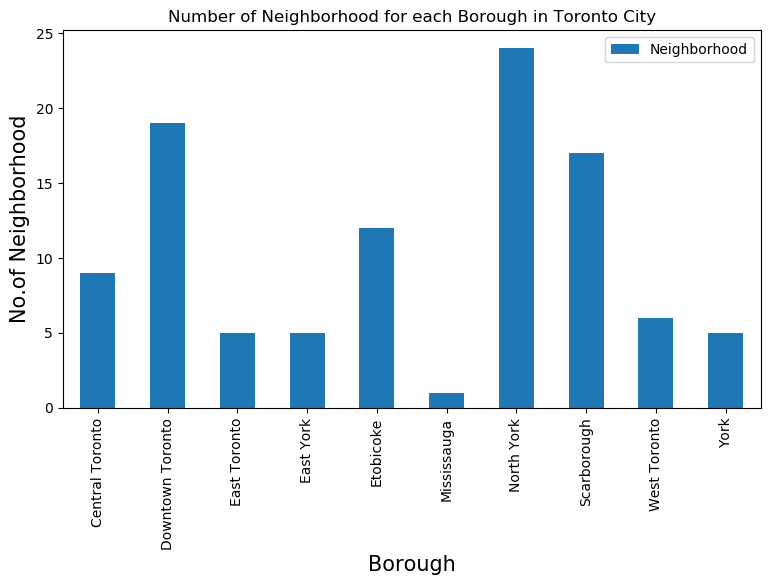

In [159]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
Toronto_geospatial.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [160]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
Bakery=pd.DataFrame(columns=column_names)
count=1
for row in Toronto_geospatial.values.tolist():
    Postalcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_Venues(Latitude,Longitude)
    Bakeries=venues[venues['Category']=='Bakery']   
    print('(',count,'/',len(Toronto_geospatial),')','Bakery in '+Neighborhood+', '+Borough+':'+str(len(Bakeries)))
    for resturant_detail in Bakeries.values.tolist():
        id, name , category=resturant_detail
        Bakery = Bakery.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Bakery in Parkwoods, North York:0
( 2 / 103 ) Bakery in Victoria Village, North York:0
( 3 / 103 ) Bakery in Harbourfront, Downtown Toronto:3
( 4 / 103 ) Bakery in Lawrence Heights, Lawrence Manor, North York:0
( 5 / 103 ) Bakery in Queen's Park, Downtown Toronto:0
( 6 / 103 ) Bakery in Islington Avenue, Etobicoke:0
( 7 / 103 ) Bakery in Rouge, Malvern, Scarborough:0
( 8 / 103 ) Bakery in Don Mills North, North York:0
( 9 / 103 ) Bakery in Woodbine Gardens, Parkview Hill, East York:0
( 10 / 103 ) Bakery in Ryerson, Garden District, Downtown Toronto:1
( 11 / 103 ) Bakery in Glencairn, North York:0
( 12 / 103 ) Bakery in Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park, Etobicoke:0
( 13 / 103 ) Bakery in Highland Creek, Rouge Hill, Port Union, Scarborough:0
( 14 / 103 ) Bakery in Flemingdon Park, Don Mills South, North York:0
( 15 / 103 ) Bakery in Woodbine Heights, East York:0
( 16 / 103 ) Bakery in St. James Town, Downtown Toronto:4
( 17 / 103 ) Bakery

In [161]:
Bakery.head()

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,Harbourfront,54ea41ad498e9a11e9e13308,Roselle Desserts
1,Downtown Toronto,Harbourfront,4b156a02f964a5207fac23e3,Brick Street Bakery
2,Downtown Toronto,Harbourfront,4ad4c05df964a5204ef620e3,The Sweet Escape Patisserie
3,Downtown Toronto,"Ryerson, Garden District",5c2151463362730039c4ef0b,Danish Pastry House
4,Downtown Toronto,St. James Town,5979225fa87921424da2e994,Sud Forno


In [162]:
Bakery.shape

(73, 4)

There are 73 Bakeries in Toronto City

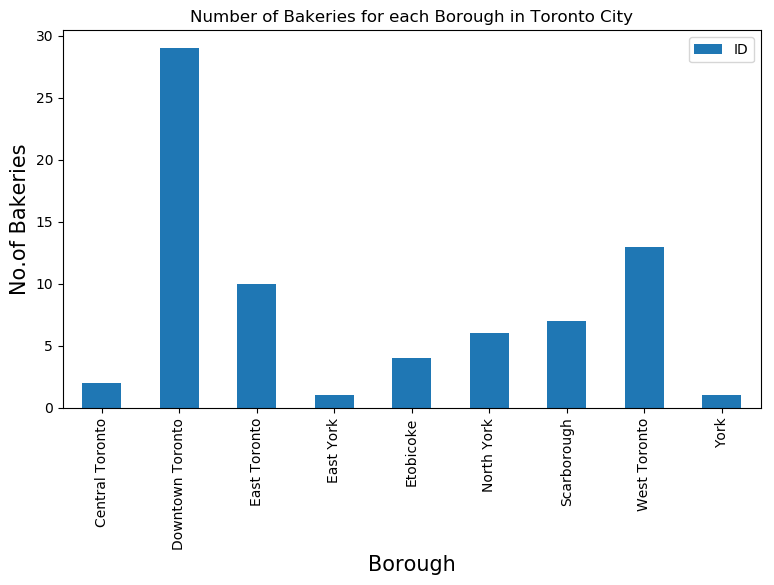

In [163]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Bakeries for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Bakeries', fontsize=15)
#giving a bar plot
Bakery.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Downtown Toronto has the largest number of Bakeries.

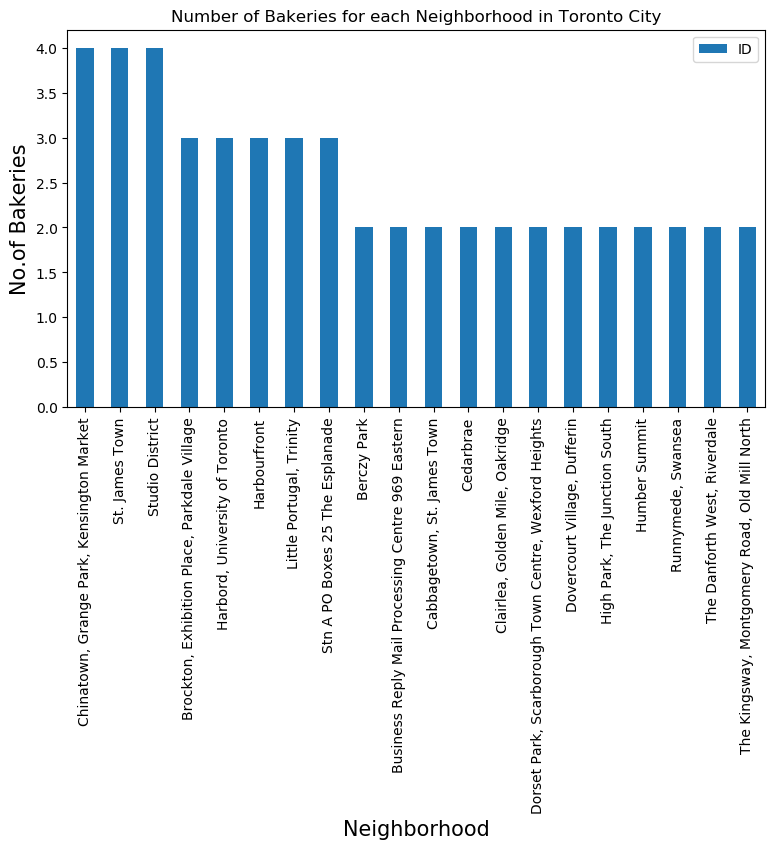

In [164]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Bakeries for each Neighborhood in Toronto City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Bakeries', fontsize=15)
#giving a bar plot
Bakery.groupby('Neighborhood')['ID'].count().nlargest(20).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


The above Bar graph shows that **Chinatown, Grange Park, Kensington Market, St.James, and Studio District** have the most number of Bakeries

In [167]:
# prepare neighborhood list that contains Bakeries
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
Bakery_stats=pd.DataFrame(columns=column_names)
count=1


for row in Bakery.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these Bakeries as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(Bakery),')','processed')
    Bakery_stats = Bakery_stats.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID              Name  Likes  Rating  Tips
0  54ea41ad498e9a11e9e13308  Roselle Desserts     47     9.0    15
( 1 / 73 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4b156a02f964a5207fac23e3  Brick Street Bakery     56     8.1    29
( 2 / 73 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4ad4c05df964a5204ef620e3  The Sweet Escape Patisserie     17     7.9    15
( 3 / 73 ) processed
                         ID                 Name  Likes  Rating  Tips
0  5c2151463362730039c4ef0b  Danish Pastry House      9     8.2     1
( 4 / 73 ) processed
                         ID       Name  Likes  Rating  Tips
0  5979225fa87921424da2e994  Sud Forno     55     8.1    10
( 5 / 73 ) processed
                         ID             Name  Likes  Rating  Tips
0  4c6eb1c9c524370414ae2beb  Stonemill Bread     11     8.7     4
( 6 / 73 ) processed
                         ID             Name  Likes 

In [169]:
Bakery_stats.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,Harbourfront,54ea41ad498e9a11e9e13308,Roselle Desserts,47,9.0,15
1,Downtown Toronto,Harbourfront,4b156a02f964a5207fac23e3,Brick Street Bakery,56,8.1,29
2,Downtown Toronto,Harbourfront,4ad4c05df964a5204ef620e3,The Sweet Escape Patisserie,17,7.9,15
3,Downtown Toronto,"Ryerson, Garden District",5c2151463362730039c4ef0b,Danish Pastry House,9,8.2,1
4,Downtown Toronto,St. James Town,5979225fa87921424da2e994,Sud Forno,55,8.1,10


In [170]:
Bakery_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
Borough         73 non-null object
Neighborhood    73 non-null object
ID              73 non-null object
Name            73 non-null object
Likes           73 non-null object
Rating          73 non-null float64
Tips            73 non-null object
dtypes: float64(1), object(6)
memory usage: 4.1+ KB


In [172]:
# Had to convert "Likes" and "Tips" from object to float types. 
Bakery_stats['Likes']=Bakery_stats['Likes'].astype('float64')
Bakery_stats['Tips']=Bakery_stats['Tips'].astype('float64')
Bakery_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
Borough         73 non-null object
Neighborhood    73 non-null object
ID              73 non-null object
Name            73 non-null object
Likes           73 non-null float64
Rating          73 non-null float64
Tips            73 non-null float64
dtypes: float64(3), object(4)
memory usage: 4.1+ KB


In [173]:
# Bakery with maximum Like
Bakery_stats.iloc[Bakery_stats['Likes'].idxmax()]

Borough                                  Downtown Toronto
Neighborhood    Chinatown, Grange Park, Kensington Market
ID                               4ad4c05cf964a52008f620e3
Name                               Wanda's Pie in the Sky
Likes                                                 136
Rating                                                8.1
Tips                                                   52
Name: 58, dtype: object

In [174]:
# Bakery with maximum Rating
Bakery_stats.iloc[Bakery_stats['Rating'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                Harbourfront
ID              54ea41ad498e9a11e9e13308
Name                    Roselle Desserts
Likes                                 47
Rating                                 9
Tips                                  15
Name: 0, dtype: object

In [175]:
# Bakery with maximum Tips
Bakery_stats.iloc[Bakery_stats['Tips'].idxmax()]

Borough                     East Toronto
Neighborhood             Studio District
ID              4ad79959f964a520990c21e3
Name                     Bonjour Brioche
Likes                                129
Rating                                 8
Tips                                  89
Name: 40, dtype: object

In [208]:
#Now lets visualize neighborhood with maximum average rating of Bakeries
lc_neighborhood_stats=Bakery_stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
lc_neighborhood_stats.columns=['Neighborhood','Average Rating']
lc_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
40,"The Danforth West, Riverdale",8.550000
2,Berczy Park,8.500000
31,North Toronto West,8.500000
38,The Beaches,8.400000
36,Stn A PO Boxes 25 The Esplanade,8.400000
32,"Parkdale, Roncesvalles",8.400000
28,Leaside,8.400000
21,Harbourfront,8.333333
35,St. James Town,8.325000
29,"Little Portugal, Trinity",8.233333


In [209]:
lc_borough_stats=Bakery_stats.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
lc_borough_stats.columns=['Borough','Average Rating']

lc_borough_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Average Rating
3,East York,8.400000
1,Downtown Toronto,7.841379
0,Central Toronto,7.700000
7,West Toronto,7.223077
8,York,6.700000
2,East Toronto,6.370000
5,North York,5.083333
4,Etobicoke,4.950000
6,Scarborough,3.000000


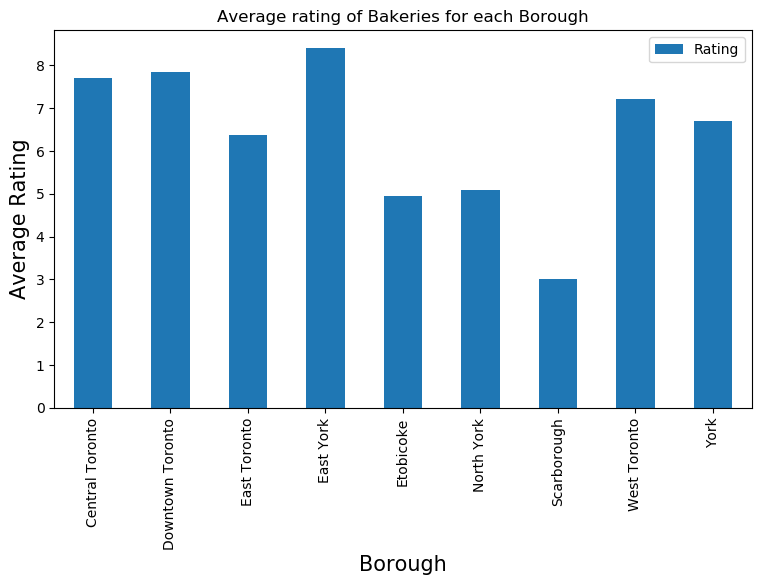

In [210]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Bakeries for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
Bakery_stats.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [211]:
lc_neighborhood_stats=lc_neighborhood_stats[lc_neighborhood_stats['Average Rating']>=6.0]
lc_neighborhood_stats

,Neighborhood,Average Rating
0,"Adelaide, King, Richmond",8.100000
1,"Bedford Park, Lawrence Manor East",7.200000
2,Berczy Park,8.500000
5,"Cabbagetown, St. James Town",7.150000
6,Caledonia-Fairbanks,6.700000
8,Central Bay Street,8.200000
9,"Chinatown, Grange Park, Kensington Market",8.150000
12,"Commerce Court, Victoria Hotel",8.100000
13,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",6.900000
14,"Design Exchange, Toronto Dominion Centre",7.500000


In [213]:
lc_neighborhood_stats=pd.merge(lc_neighborhood_stats,Toronto_geospatial, on='Neighborhood')
lc_neighborhood_stats=lc_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
lc_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,8.100000
1,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,7.200000
2,Downtown Toronto,Berczy Park,43.644771,-79.373306,8.500000
3,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,7.150000
4,York,Caledonia-Fairbanks,43.689026,-79.453512,6.700000
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,8.200000
6,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,8.150000
7,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,8.100000
8,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,6.900000
9,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,7.500000


In [215]:
# create map and display it
ny_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in lc_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
#Lets add a new field to dataframe for labeling purpose


lc_neighborhood_stats['Label']=lc_neighborhood_stats['Neighborhood']+', '+lc_neighborhood_stats['Borough']+'('+lc_neighborhood_stats['Average Rating'].map(str)+')'

# add pop-up text to each marker on the map
for lat, lng, label in lc_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)